<a href="https://colab.research.google.com/github/nhatchung14/PythonNotebooks/blob/master/1_Lab_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd 'My Drive'/'Colab Notebooks'/Lab6/2-Decision-Tree


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive
/gdrive/My Drive/Colab Notebooks/Lab6/2-Decision-Tree


# Decision Tree in Python

## Introduction


* Author: thuanle@hcmut.edu.vn

* Content:
  - Practice the DecisionTree classifier
  - Learn more about split the dataset into train and test.
  - Evaluation by Accuracy score
* Major steps:
  - Load data from CSV, split into trainning set and test set
  - Buidling kNN model.
  - Evaluating results
  - Training DecisionTree classifier model
  - Evaluating results
  - Visualize models

## Configuration

In [0]:
dataset_filename = "bill_authentication.csv"

## Grab the data

Since our file is in CSV format, we will use panda's read_csv method to read our CSV data file. Execute the following script to do so:

In [3]:
import pandas as pd  
dataset = pd.read_csv(dataset_filename)
dataset.shape

(1372, 5)

In [4]:
# Overview about dataset
dataset.keys()

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [5]:
dataset.head()  

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Prepare train data and test set

The label is describe in **Class** column. So that we devide the dataset into attributes and labels

In [0]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class']  

Here the X variable contains all the columns from the dataset, except the **Class** column, which is the label.

The y variable contains the values from the **Class** column. 

The X variable is our attribute set and y variable contains corresponding labels.

### Dividing our data into training and test sets. 

So, we split the test into 2 sets: training set and testing set. We use to split up 20% of the data in to the test set and 80% for training.

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, y_train.size)
print(X_test.shape, y_test.shape)

(1097, 4) 1097
(275, 4) (275,)


## Training with Decision Tree

Now, let's build a **Decision Tree** model

### a) criterion='gini'

In [8]:
from sklearn.tree import DecisionTreeClassifier  
dt = DecisionTreeClassifier(criterion='gini')  
dt.fit(X_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
y_pred_dt = dt.predict(X_test)  
y_pred_dt

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

##### Evaluating the Algorithm



In [10]:
dt_score = dt.score(X_test, y_test)
print(f"Decision Tree classifier accuracy score is {dt_score}")

Decision Tree classifier accuracy score is 0.9927272727272727


### b) criterion='entropy'

In [11]:
from sklearn.tree import DecisionTreeClassifier  
dt2 = DecisionTreeClassifier(criterion='entropy')  
dt2.fit(X_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
y_pred_dt = dt2.predict(X_test)  
y_pred_dt

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

##### Evaluating the Algorithm



In [13]:
dt_score = dt.score(X_test, y_test)
print(f"Decision Tree classifier accuracy score is {dt_score}")

Decision Tree classifier accuracy score is 0.9927272727272727


## Extra section

### Visualize decision tree

We can visualize the Decision Tree model using the [Graphviz](https://www.graphviz.org/) tool.

Graphviz is an easy tool for drawing graph. For example: the code

```
digraph G {Hello->World}
```

will generate the following graph

![digraph](https://graphviz.gitlab.io/_pages/Gallery/directed/hello.png)

* More example https://www.graphviz.org/gallery/
* You can play around at http://www.webgraphviz.com/ or https://dreampuf.github.io/GraphvizOnline/

So let's generate the graph.

In [14]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt, out_file=None)
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.32\ngini = 0.494\nsamples = 1097\nvalue = [607, 490]"] ;
1 [label="X[1] <= 7.293\ngini = 0.292\nsamples = 519\nvalue = [92, 427]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= -0.257\ngini = 0.116\nsamples = 435\nvalue = [27, 408]"] ;
1 -> 2 ;
3 [label="X[2] <= 6.216\ngini = 0.065\nsamples = 384\nvalue = [13, 371]"] ;
2 -> 3 ;
4 [label="X[0] <= -0.362\ngini = 0.007\nsamples = 270\nvalue = [1, 269]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 262\nvalue = [0, 262]"] ;
4 -> 5 ;
6 [label="X[2] <= 2.61\ngini = 0.219\nsamples = 8\nvalue = [1, 7]"] ;
4 -> 6 ;
7 [label="gini = 0.0\nsamples = 7\nvalue = [0, 7]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
6 -> 8 ;
9 [label="X[1] <= -4.675\ngini = 0.188\nsamples = 114\nvalue = [12, 102]"] ;
3 -> 9 ;
10 [label="gini = 0.0\nsamples = 101\nvalue = [0, 101]"] ;
9 -> 10 ;
11 [label="X[1] <= -2.962\ngini = 0.142\nsamples = 13\nvalue = [12, 

In [18]:
from sklearn.tree import export_graphviz
dot_data2 = export_graphviz(dt2, out_file=None)
print(dot_data2)

digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 0.747\nentropy = 0.992\nsamples = 1097\nvalue = [607, 490]"] ;
1 [label="X[1] <= 5.161\nentropy = 0.773\nsamples = 590\nvalue = [134, 456]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[0] <= 0.32\nentropy = 0.459\nsamples = 465\nvalue = [45, 420]"] ;
1 -> 2 ;
3 [label="X[2] <= 3.064\nentropy = 0.28\nsamples = 412\nvalue = [20, 392]"] ;
2 -> 3 ;
4 [label="entropy = 0.0\nsamples = 250\nvalue = [0, 250]"] ;
3 -> 4 ;
5 [label="X[1] <= -1.82\nentropy = 0.539\nsamples = 162\nvalue = [20, 142]"] ;
3 -> 5 ;
6 [label="X[0] <= -0.651\nentropy = 0.107\nsamples = 142\nvalue = [2, 140]"] ;
5 -> 6 ;
7 [label="entropy = 0.0\nsamples = 137\nvalue = [0, 137]"] ;
6 -> 7 ;
8 [label="X[2] <= 7.531\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]"] ;
6 -> 8 ;
9 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
8 -> 9 ;
10 [label="entropy = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
8 -> 10 ;
11 [label="X[0] <= -2.156\nentropy =

Copy the code above, paste it to online graphviz service like http://viz-js.com/ and see the result.

### Jypiter does it all

If we want to display the graph automatically inside Jupiter, we'll need
* Install Graphviz binary
* Call the Graphviz inside Jupiter and grab the result.

**Note**: Google Colab does not let us install Graphviz binary, so that we cant make with work with Google Colab.


In [16]:
"""
Install lib that call Graphviz binary
"""

!pip3 install graphviz

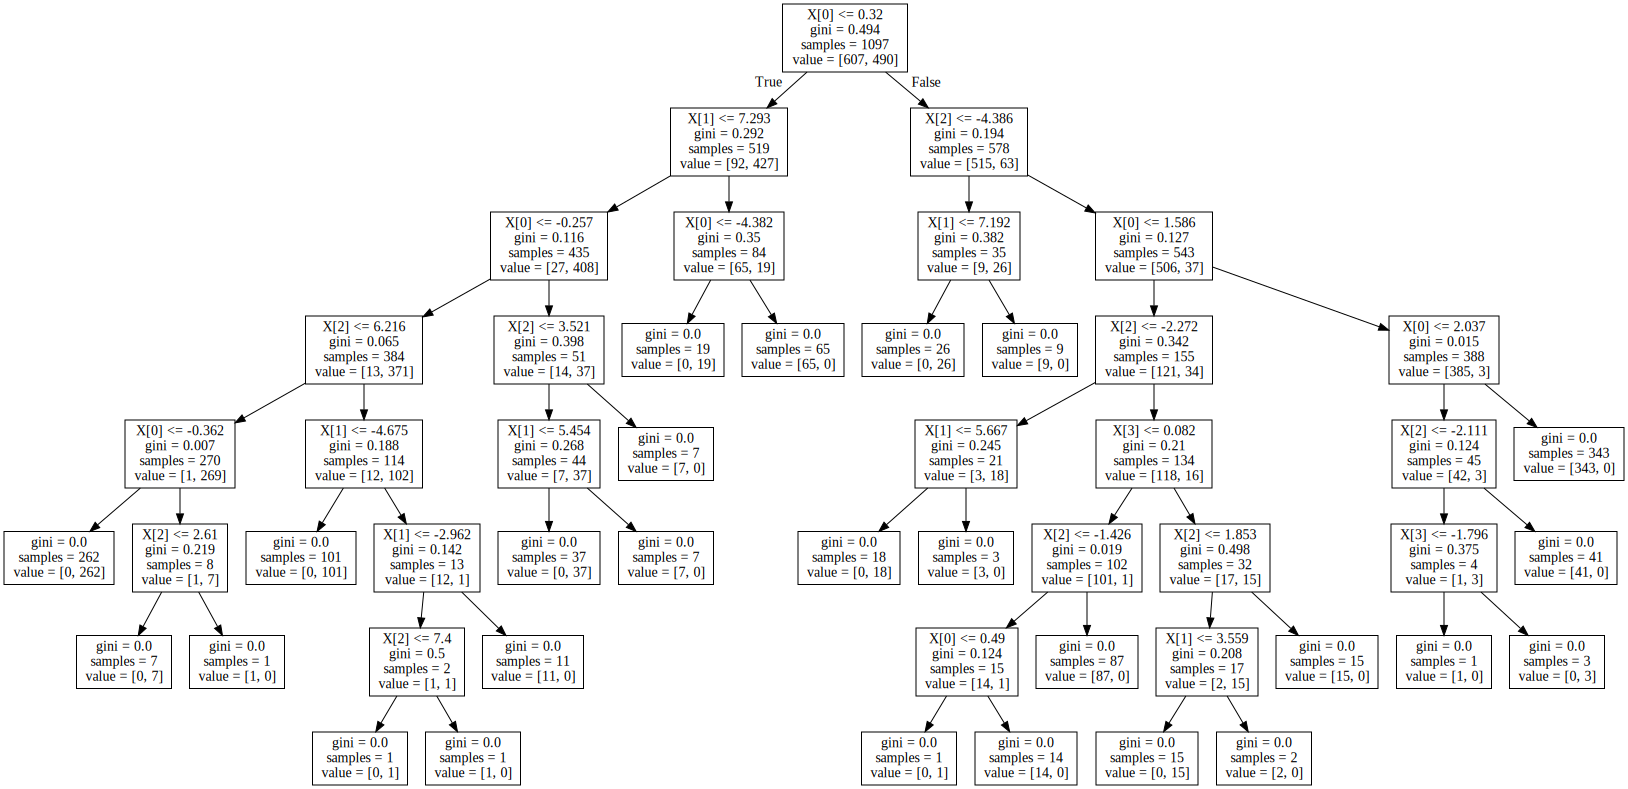

In [17]:
import graphviz 
graph = graphviz.Source(dot_data)
graph

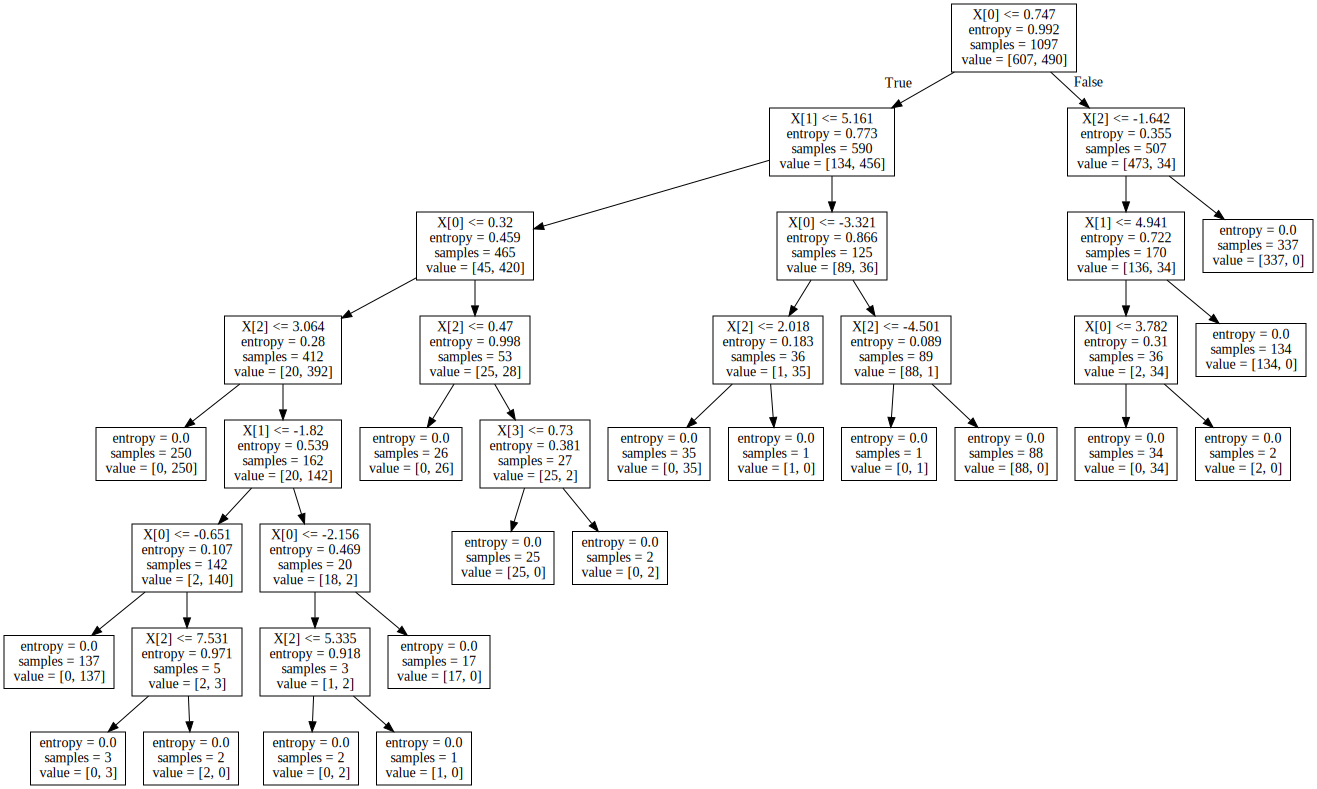

In [19]:
import graphviz 
graph = graphviz.Source(dot_data2)
graph